In [1]:
import numpy as np
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split #Splits the dataset into training and test sets.
from sklearn.metrics import accuracy_score #Evaluates the model's accuracy
from sklearn.preprocessing import LabelEncoder #Converts categorical labels into numeric labels
from sklearn.tree import plot_tree #Visualizes the trained decision tree

In [4]:
csv_file_path = "/content/drug200.csv" #specify the file path
drug_prediction = pd.read_csv(csv_file_path) # Read the CSV file into a DataFrame
drug_prediction.head() # Display the first five rows of the DataFrame

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,F,HIGH,HIGH,25.355,drugY
1,47,M,LOW,HIGH,13.093,drugC
2,47,M,LOW,HIGH,10.114,drugC
3,28,F,NORMAL,HIGH,7.798,drugX
4,61,F,LOW,HIGH,18.043,drugY


In [6]:
drug_prediction.info

<bound method DataFrame.info of      Age Sex      BP Cholesterol  Na_to_K   Drug
0     23   F    HIGH        HIGH   25.355  drugY
1     47   M     LOW        HIGH   13.093  drugC
2     47   M     LOW        HIGH   10.114  drugC
3     28   F  NORMAL        HIGH    7.798  drugX
4     61   F     LOW        HIGH   18.043  drugY
..   ...  ..     ...         ...      ...    ...
195   56   F     LOW        HIGH   11.567  drugC
196   16   M     LOW        HIGH   12.006  drugC
197   52   M  NORMAL        HIGH    9.894  drugX
198   23   M  NORMAL      NORMAL   14.020  drugX
199   40   F     LOW      NORMAL   11.349  drugX

[200 rows x 6 columns]>

In [7]:
# Create a copy to preserve the original dataset
data = drug_prediction.copy()

# Initialize the LabelEncoder
encoder = LabelEncoder()

# Encode categorical features and target variable
data['Sex'] = encoder.fit_transform(data['Sex'])
data['BP'] = encoder.fit_transform(data['BP'])
data['Cholesterol'] = encoder.fit_transform(data['Cholesterol'])
data['Drug'] = encoder.fit_transform(data['Drug'])

In [8]:
X = data[['Age', 'Sex', 'BP', 'Cholesterol', 'Na_to_K']]
y = data[['Drug']]

X.head()

,Age,Sex,BP,Cholesterol,Na_to_K
0,23,0,0,0,25.355
1,47,1,1,0,13.093
2,47,1,1,0,10.114
3,28,0,2,0,7.798
4,61,0,1,0,18.043


In [9]:
y.head()

,Drug
0,4
1,2
2,2
3,3
4,4


In [10]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [11]:
decision_tree = DecisionTreeClassifier(random_state=42)

In [12]:
decision_tree.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

In [13]:
y_pred = decision_tree.predict(X_test)
print(y_pred)

[3 4 3 2 4 4 4 3 0 3 0 3 4 0 1 4 1 3 2 4 1 3 3 4 4 4 2 3 4 3 4 2 2 4 0 4 3
 0 4 0]


In [14]:
accuracy = accuracy_score(y_test, y_pred)
print(f"Model Accuracy: {accuracy:.0%}")

Model Accuracy: 100%


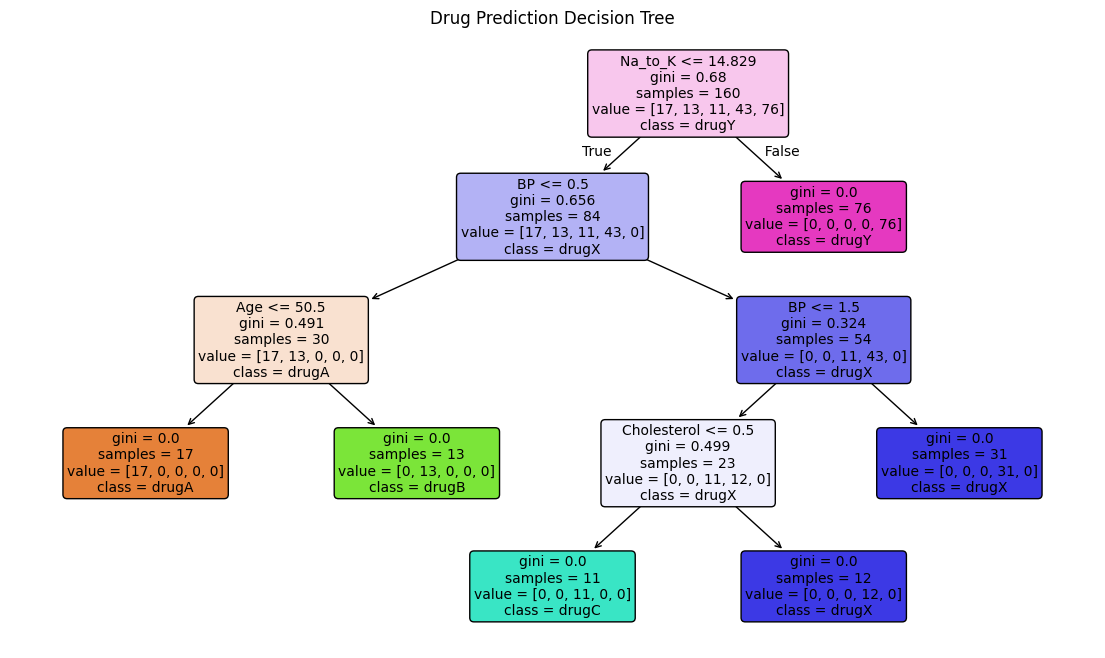

In [15]:
import matplotlib.pyplot as plt

plt.figure(figsize=(14, 8))
plot_tree(decision_tree, feature_names=X.columns, class_names=encoder.classes_, filled=True, rounded=True, fontsize=10)
plt.title("Drug Prediction Decision Tree")
plt.show()